In [43]:
import numpy as np
import pandas as pd

### Q1) Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column. 

In [44]:
#Load the dataset
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

#Print first 5 rows
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [45]:
#Print last 5 rows
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [46]:
#Print the dimension of the dataset
df.shape

(13611, 17)

#### This dataset has 13611 rows and 17 columns in which the first 16 columns are features and the last column is target variable(class label)

In [47]:
# Count the number of missing values in 'Class'
missing_count = df['Class'].isna().sum()
print(f"Missing values in Class column: {missing_count}")

Missing values in Class column: 0


#### There are no missing values in Class column

In [48]:
value_counts = df['Class'].value_counts()
print("Value counts in Class column:\n", value_counts)

Value counts in Class column:
 Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


#### There are 7 unique values in Class column. Which means there are 7 class labels (7 different types of dry beans)

In [49]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### There are no missing values in any of the columns

In [50]:
# Find columns with any zero values
columns_with_zeros = df.columns[(df == 0).any()]
print(columns_with_zeros)

Index([], dtype='object')


#### There are no columns with the value as 0

### Q2) Split the dataset into features (X) and the target variable (y), and further divide into training and test sets. [Consider test_size=0.2]

In [51]:
#Drop class column and take the remaining columns as features/attributes (X)
X = df.drop('Class', axis =1).values

#Take the class column as target variable (y)
y = df['Class'].values

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#Divide the data into training and test with test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Q3) Perform data scaling and modelling.

#### In our dataset the attributes have continous values so we will use Gaussian Naive Bayes. Now the best approach of normalization for Gaussian Naive Bayes and Logistic regression is Z-score normalization also called as standardization

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Print the first 5 rows of X_train
print("First 5 rows of X_train:")
print(X_train[:5])

First 5 rows of X_train:
[[-0.3713618  -0.53113068 -0.69536968  0.08665715 -1.29379955 -1.51596432
  -0.38003852 -0.36109817  0.85742085  1.25610037  1.51686446  1.44683238
  -0.33981809  1.1180828   1.48524952  0.95141545]
 [ 0.02895235  0.49881788  0.78351767 -0.54035181  2.40181155  1.49345505
   0.03532258  0.15031994 -2.94171863 -0.84382916 -2.37816082 -1.99994765
   0.55140561 -1.32149685 -1.87953411  0.15816122]
 [ 0.72707783  0.79500482  0.82438155  0.92484936  0.07690248  0.33083582
   0.71712016  0.92324284  1.20311675  0.61879181  0.25449758 -0.20110382
  -1.16093136 -0.78767344 -0.2375073  -0.35302552]
 [ 0.73213127  0.8835923   1.02089657  0.72564285  0.61489533  0.72119375
   0.7353826   0.9284194   0.8704588  -0.47939515 -0.2539808  -0.71595896
  -0.96978627 -1.03243811 -0.7329069  -0.97350404]
 [-0.13350882 -0.25749702 -0.48124173  0.49413949 -1.38102267 -1.71349511
  -0.14403943 -0.04976599  0.71386324  1.24723519  1.53106032  1.56981612
  -0.78663151  0.91936889  1.62

### Q4) Train Naive bayes and logistic regression

In [56]:
#Import library of Gaussian NB model
from sklearn.naive_bayes import GaussianNB

In [57]:
#Create a Gaussian Classifier
GaussianModel = GaussianNB()

#Train the model using the training sets
GaussianModel.fit(X_train,y_train)

GaussianNB()

In [58]:
#Predict on test data by NB model
y_pred_by_NB = GaussianModel.predict(X_test)

In [60]:
#Import library of LogisticRegression
from sklearn.linear_model import LogisticRegression

In [61]:
#Create a LogisticRegression model
LRModel = LogisticRegression()

#Train the model using the training sets
LRModel.fit(X_train,y_train)

LogisticRegression()

In [62]:
#Predict on test data by LogisticRegression model
y_pred_by_LR = LRModel.predict(X_test)

### Q5) Evaluate the model performance using a classification report and accuracy score and compare both the models

In [73]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_by_NB)
print("Classification Report from NB model:\n", report)

Classification Report from NB model:
               precision    recall  f1-score   support

    BARBUNYA       0.90      0.80      0.85       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.86      0.92      0.89       326
    DERMASON       0.93      0.86      0.90       709
       HOROZ       0.95      0.95      0.95       386
       SEKER       0.92      0.94      0.93       406
        SIRA       0.81      0.89      0.84       527

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [74]:
report = classification_report(y_test, y_pred_by_LR)
print("Classification Report from LR model:\n", report)

Classification Report from LR model:
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.85      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [69]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_by_NB)
print("Accuracy Score by NB model:", accuracy)

accuracy = accuracy_score(y_test, y_pred_by_LR)
print("Accuracy Score by LR model:", accuracy)

Accuracy Score by NB model: 0.8979067205288285
Accuracy Score by LR model: 0.9214102093279471


#### Both Naive Bayes and Logistic Regression model is performing more or less the same. **But Logistic Regression model is performing a little better than Naive Bayes model.**

### Q6) Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives for both models.

In [64]:
from sklearn.metrics import confusion_matrix

#Evaluate Results by NB model
cm_by_nb = confusion_matrix(y_test, y_pred_by_NB)
print("Confusion Matrix by NB Model")
print(cm_by_nb)

Confusion Matrix by NB Model
[[211   0  40   0   1   2  11]
 [  0 104   0   0   0   0   0]
 [ 19   0 301   0   5   1   0]
 [  0   0   0 610   0  21  78]
 [  0   0   6   5 368   0   7]
 [  1   0   0   5   0 383  17]
 [  3   0   2  34  12   8 468]]


In [70]:
#Confusion matrix by NB model
pd.crosstab(y_test, y_pred_by_NB, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA,All
Actual,,,,,,,,
BARBUNYA,211,0,40,0,1,2,11,265
BOMBAY,0,104,0,0,0,0,0,104
CALI,19,0,301,0,5,1,0,326
DERMASON,0,0,0,610,0,21,78,709
HOROZ,0,0,6,5,368,0,7,386
SEKER,1,0,0,5,0,383,17,406
SIRA,3,0,2,34,12,8,468,527
All,234,104,349,654,386,415,581,2723


In [65]:
#Evaluate Results by Logistic Regression model
cm_by_lr = confusion_matrix(y_test, y_pred_by_LR)
print("Confusion Matrix by LR Model")
print(cm_by_lr)

Confusion Matrix by LR Model
[[236   0  18   0   0   4   7]
 [  0 104   0   0   0   0   0]
 [  8   0 307   0   5   2   4]
 [  0   0   0 644   0  13  52]
 [  2   0   4   5 367   0   8]
 [  2   0   0   5   0 387  12]
 [  0   0   1  43   9  10 464]]


In [72]:
#Confusion matrix by LR model
pd.crosstab(y_test, y_pred_by_LR, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA,All
Actual,,,,,,,,
BARBUNYA,236,0,18,0,0,4,7,265
BOMBAY,0,104,0,0,0,0,0,104
CALI,8,0,307,0,5,2,4,326
DERMASON,0,0,0,644,0,13,52,709
HOROZ,2,0,4,5,367,0,8,386
SEKER,2,0,0,5,0,387,12,406
SIRA,0,0,1,43,9,10,464,527
All,248,104,330,697,381,416,547,2723


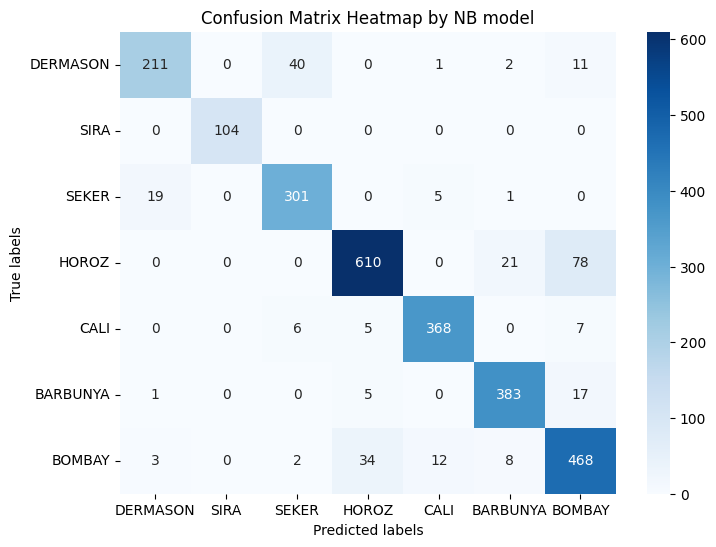

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix by NB model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_by_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['DERMASON','SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'] , 
            yticklabels=['DERMASON','SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap by NB model')
plt.show()

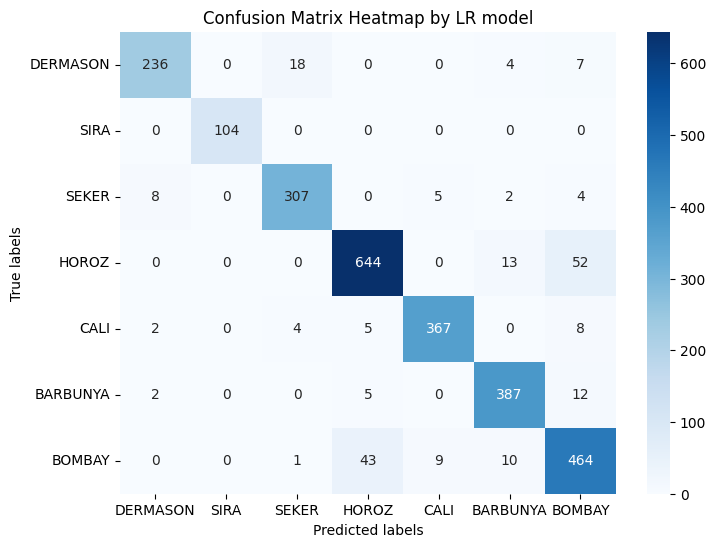

In [68]:
# Create a heatmap of the confusion matrix by NB model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_by_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['DERMASON','SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'] , 
            yticklabels=['DERMASON','SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap by LR model')
plt.show()

### Q7) Write some conclusion commenting which model is better and why ? 

For this dataset both Naive Bayes and Logistic Regression model is performing more or less the same. 

**According to the model metrics Logistic Regression model is performing a little better than Naive Bayes model**

In our dataset we have few correlated features but Naive Bayes model assumes that features are conditionally independent given the class label whereas Logistic Regression often performs better when we have highly correlated features, provide interpretable coefficients, and does not rely on strong assumptions about feature independence. Thus Logistic Regression model will always perform better than Naive Bayes model when we have dataset with correlated features.